## K-Means Clustering

In the following sub-questions, you will run K-Means clustering on a 2 dimensional dataset, find the optimal number of clusters K and visualize the result. Then, you will fit a Gaussian distribution to each cluster and report a mixture of Gaussian distributions for the dataset.

### Import libraries

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys

np.set_printoptions(threshold=sys.maxsize)

### Import Data and visualize through a scatter plot

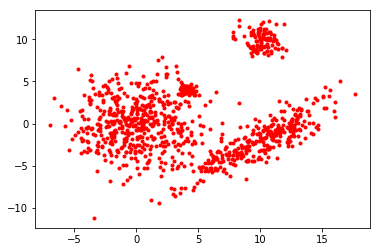

In [2]:
with open('midterm_kmeans_train', 'rb') as f:
    x = pickle.load(f)

plt.plot(x[:,0], x[:,1],'ro', markersize=3)
    
#Your code below

### Fit the data
Run K-means for different values of k from 1 to 8. Show the clusters for each value of k and plot the within cluster distance to the centroid a function of k.

In [20]:
squared_dist = []

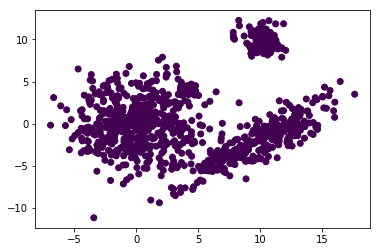

In [21]:
model = KMeans(n_clusters = 1)
model.fit(x)
pred = model.predict(x)
plt.scatter(x[:,0], x[:,1], c = pred)
squared_dist.append(model.inertia_)

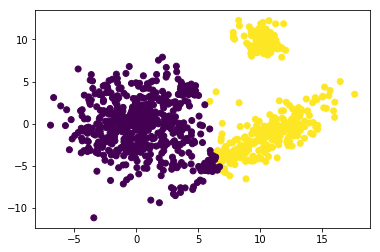

In [22]:
model = KMeans(n_clusters = 2)
model.fit(x)
pred = model.predict(x)
plt.scatter(x[:,0], x[:,1], c = pred)
squared_dist.append(model.inertia_)

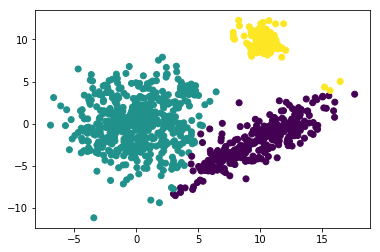

In [23]:
model = KMeans(n_clusters = 3)
model.fit(x)
pred = model.predict(x)
plt.scatter(x[:,0], x[:,1], c = pred)
squared_dist.append(model.inertia_)

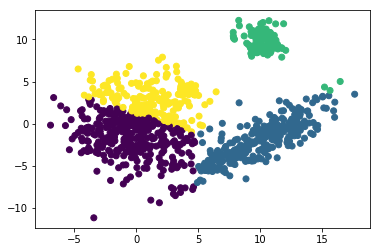

In [24]:
model = KMeans(n_clusters = 4)
model.fit(x)
pred = model.predict(x)
plt.scatter(x[:,0], x[:,1], c = pred)
squared_dist.append(model.inertia_)

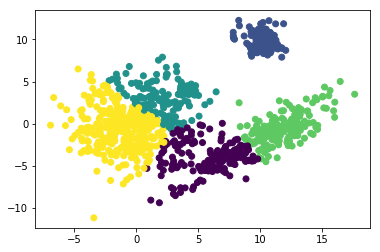

In [25]:
model = KMeans(n_clusters = 5)
model.fit(x)
pred = model.predict(x)
plt.scatter(x[:,0], x[:,1], c = pred)
squared_dist.append(model.inertia_)

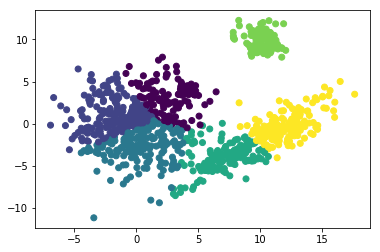

In [26]:
model = KMeans(n_clusters = 6)
model.fit(x)
pred = model.predict(x)
plt.scatter(x[:,0], x[:,1], c = pred)
squared_dist.append(model.inertia_)

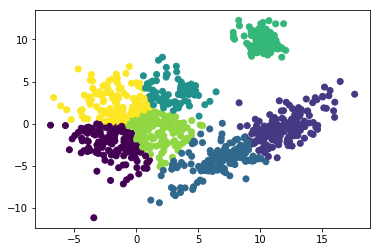

In [27]:
model = KMeans(n_clusters = 7)
model.fit(x)
pred = model.predict(x)
plt.scatter(x[:,0], x[:,1], c = pred)
squared_dist.append(model.inertia_)

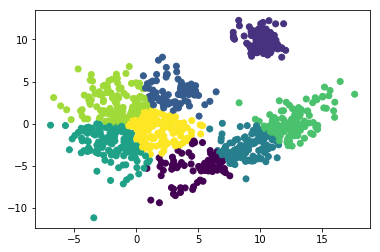

In [28]:
model = KMeans(n_clusters = 8)
model.fit(x)
pred = model.predict(x)
plt.scatter(x[:,0], x[:,1], c = pred)
squared_dist.append(model.inertia_)

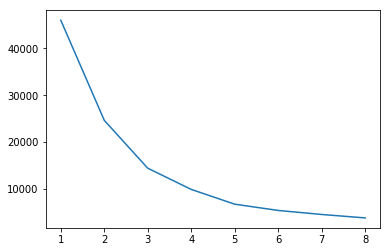

In [29]:
clusters = np.linspace(1,8,8)
plt.plot(clusters, squared_dist)

### Select K
Identify a suitable choice of K for the given data set from the above exercise.

- From the elbow method we can say that the number of clusters can be 3 as the squared distance change is more after 3 clusters.

### Fit Gaussians
Fit Gaussian distribution to each cluster by estimating the mean and covariance matrix of the cluster.

In [31]:
model = KMeans(n_clusters = 3)
model.fit(x)
pred = model.predict(x)

In [33]:
import pandas as pd
data = pd.DataFrame(x)

In [35]:
data['clusters'] = pred

In [36]:
data.head()

,0,1,clusters
0,13.318215,1.591011,2
1,5.076363,0.892027,0
2,12.473208,-0.240893,2
3,-2.704545,-2.619415,0
4,3.890202,4.099228,0


In [44]:
cluster1 = data[data['clusters'] == 0].iloc[:,:2]

In [47]:
mean_cluster1 = cluster1.mean()
cov_cluster1 = cluster1.cov()
print(mean_cluster1)
print(cov_cluster1)

0    0.675128
1    0.661421
dtype: float64
          0         1
0  7.333597  2.320724
1  2.320724  9.388645


In [48]:
cluster2 = data[data['clusters'] == 1].iloc[:,:2]
mean_cluster2 = cluster2.mean()
cov_cluster2 = cluster2.cov()
print(mean_cluster2)
print(cov_cluster2)

0    10.279786
1     9.727972
dtype: float64
          0        1
0  1.672773 -1.00353
1 -1.003530  1.92372


In [49]:
cluster3 = data[data['clusters'] == 2].iloc[:,:2]
mean_cluster3 = cluster3.mean()
cov_cluster3 = cluster3.cov()
print(mean_cluster3)
print(cov_cluster3)

0    9.822724
1   -2.094355
dtype: float64
          0         1
0  8.101446  5.604572
1  5.604572  5.606567


### Describe the mixture of Gaussian distributions
Describe a mixture of gaussian distributions for the given data set, i.e., specify the weights for each cluster and the associated mean and covariance matrices.

- weights are the probabilities of selecting the cluster distribution, because there unequal number of samples for each cluster

In [50]:
p1 = cluster1.shape[0]/x.shape[0]
print('weight of cluster1: ', p1)
print(mean_cluster1)
print(cov_cluster1)
p2 = cluster2.shape[0]/x.shape[0]
print('weight of cluster2: ', p2)
print(mean_cluster2)
print(cov_cluster2)
p3 = cluster3.shape[0]/x.shape[0]
print('weight of cluster3: ', p3)
print(mean_cluster3)
print(cov_cluster3)

weight of cluster1:  0.587
0    0.675128
1    0.661421
dtype: float64
          0         1
0  7.333597  2.320724
1  2.320724  9.388645
weight of cluster2:  0.103
0    10.279786
1     9.727972
dtype: float64
          0        1
0  1.672773 -1.00353
1 -1.003530  1.92372
weight of cluster3:  0.31
0    9.822724
1   -2.094355
dtype: float64
          0         1
0  8.101446  5.604572
1  5.604572  5.606567


### Sample from the  GMM 
Sample 1000 points from the mixture of gaussians and visualize through a scatter plot. Comment.

In [51]:
points = []
for i in range(1000):
    cluster = np.random.choice([0,1,2], replace = False, p = [p1,p2,p3])
    if cluster == 0:
        point = np.random.multivariate_normal(mean_cluster1, cov_cluster1)
        points.append(point)
    if cluster == 1:
        point = np.random.multivariate_normal(mean_cluster2, cov_cluster2)
        points.append(point)
    if cluster == 2:
        point = np.random.multivariate_normal(mean_cluster3, cov_cluster3)
        points.append(point)
        

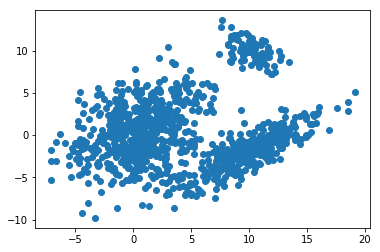

In [52]:
points = np.array(points)
plt.scatter(points[:,0], points[:,1])

- By using the mixture we could generate a similar data as the original data